In [1]:
from pathlib import Path

import setup
from camtrappy.io import video

Current working directory: n:\Mitarbeiter\Florian\projects\CamTrapPy


In [16]:
import os
from pathlib import Path

import cv2
from matplotlib import pyplot as plt

cwd = 'n:\Mitarbeiter\Florian\projects\CamTrapPy'
data_path = Path(cwd) / 'testdata' / 'videos'
data = data_path.glob('*')
video_list = video.get_video_paths("testdata/videos", ["mkv"])

In [23]:
video.get_video_paths("testdata", ["mkv"])

['testdata\\animals\\21_Herrenberg\\20180916_014502_3A26_00408CC583CD.mkv',
 'testdata\\animals\\21_Herrenberg\\20180916_025001_D8C1_00408CC583CD.mkv',
 'testdata\\animals\\21_Herrenberg\\20180916_025502_5F44_00408CC583CD.mkv',
 'testdata\\animals\\21_Herrenberg\\20180916_030002_1D11_00408CC583CD.mkv',
 'testdata\\animals\\21_Herrenberg\\20180916_033503_44B3_00408CC583CD.mkv',
 'testdata\\animals\\25_Stockach\\20181003_195526_2DEE.mkv',
 'testdata\\animals\\25_Stockach\\20181003_202031_28C4.mkv',
 'testdata\\animals\\25_Stockach\\20181003_205038_87B6.mkv',
 'testdata\\animals\\25_Stockach\\20181003_210541_4DB9.mkv',
 'testdata\\animals\\25_Stockach\\20181003_211042_5B75.mkv',
 'testdata\\animals\\25_Stockach\\20181003_212546_56C7.mkv',
 'testdata\\animals\\25_Stockach\\20181003_225103_5620.mkv',
 'testdata\\animals\\25_Stockach\\20181003_225604_D18B.mkv',
 'testdata\\animals\\25_Stockach\\20181003_233112_BCFF.mkv',
 'testdata\\animals\\25_Stockach\\20181003_233613_40E8.mkv',
 'testdata

This is how to display an image from disk in a notebook:

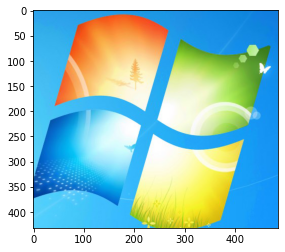

In [20]:
img_path = str(Path(cwd) / 'testdata' / 'images' / 'bild.jpg')
img = cv2.imread(img_path)

# cv2 and plt order the color channels differently
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

Displaying a frame from a video is as straightforward as displaying an image on disk.

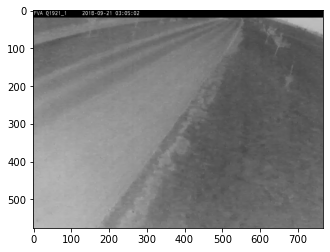

In [21]:
vid_path = str(next(data))
cap = cv2.VideoCapture(vid_path)
ret, frame = cap.read()
cap.release()

# cv2 and plt order the color channels differently
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

Running a cv2 video in a jupyter notebook is not fast and not super straightforward. E.g. the test below with matplotlib does not work as hoped.

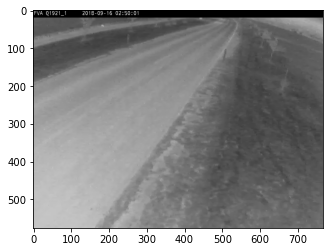

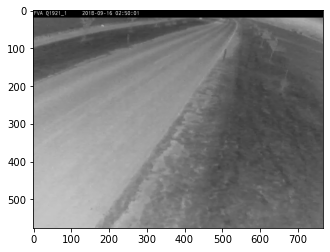

In [29]:
vid_path = str(next(data))
cap = cv2.VideoCapture(vid_path)

i = 0
while(i < 2):
    i += 1
    ret, frame = cap.read()

    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.show()

cap.release()

A better and more efficient solution is running the video with cv2's own library

In [35]:
vid_path = str(next(data))
cap = cv2.VideoCapture(vid_path)

while(cap.isOpened()):
    ret, frame = cap.read()
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame', frame)
    # cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Multiprocessing

Our problem is first and foremost a single continuous analysis (e.g. we are primarily interested in the changes from one frame/picture to the other and in tracking changes). Only on second thought do we see possibilities for concurrent analysis:
* we could analyse different locations at the same time with multiple cores while each location itself is single-threaded
* we could analyse different batches of images that are per definition separate events even though they belong to the same location. This would actually also be true for videos that are not continuously recorded.

Which one of the three possible libraries `threading`, `asyncio` and `multiprocessing` to use...?
* multiprocessing is for distributing the work equally over all cores.
* asyncio and threading are similar. Asyncio is the better choice if libraries you rely on support it. Otherwise there won't really be a performance gain over threading! Thus, for simple I/O (read video/image files) threading is probably better.